# <center>DSA8023 Analytathon 1: Report on predicting EV users from Energia's electricity consumption data  </center>
### <center> Varun Suresh Kumar (40364111) <br/><br/> 31-05-2023</center>

## <a id='0' href="#0">Table of Contents:</a>

<a href="#intro">1. Introduction</a><br/>
<a href="#state">2. Statement of the problem</a><br/>
<a href="#obj">3. Research Objective</a><br/>
<a href="#overview">4. Data Overview</a><br/> 
    &emsp;&emsp;<a href="#4_1">4.1 Description of Variables </a><br/>
    &emsp;&emsp;<a href="#4_2">4.2 Exploratory Data Analysis</a><br/>
    &emsp;&emsp;<a href="#4_3">4.3 Measure of Association</a><br/>
    &emsp;&emsp;<a href="#4_4">4.4 Data wrangling</a><br/>
<a href="#method">5. Methodology</a><br/>
<a href="#comparison">6. Comparison of Modal performance</a><br/>
<a href="#results">7. Results and discussion</a><br/>
<a href="#conclusion">8. Conclusion</a><br/>
<a href="#references">9. References</a><br/>


## <a id='intro' href="#intro">Introduction</a>

Electric or hybrid vehicles will account for 20% of all new passenger vehicle sales by 2022, with over 70,000 EVs on the road in Ireland (ROI). As of Q1 2023, the proportion of new passenger autos acquired is growing rapidly (Prendergast, 2023). Energia accounts for 10% of all electric vehicle users. Finding the remaining suspected EV users who are not enrolled in Energia's EV Tariff is a challenge. In the existing database, only over 2,400 consumers have been identified as the EV Tariff consumers, indicating a considerable untapped market potential. The research on customer’s preference to choose alternative energy suppliers and spreading awareness on the customer benefits of Energia's EV Tariff, is crucial for Energia's market share growth.

Energia can construct prediction models using ML algorithms   that assess the likelihood of consumers acquiring an EV based on a variety of data points such as energy use trends, demographic information, and geographic location. These models can help Energia prioritise and target potential EV purchasers within its customer base who have not yet opted into the EV Tariff. By combining these ML predictions with additional sources of data, like vehicle registration databases and public charging station consumption data, Energia can improve the accuracy of identifying suspected EV customers.

This report will employ a number of research methodologies and analytical techniques to uncover an untapped market of prospective EV purchasers in Ireland. We will get valuable insights into the qualities, behaviour, and preferences of the target audience by examining customer data, conducting surveys, and researching market trends. These insights will assist Energia in developing data-driven strategies to meet the specific demands of the undiscovered niche, matching its offers to consumer expectations, and positioning itself as a leading provider in the EV energy market. By bridging the gap between recognised EV consumers and the untapped sector, Energia can contribute to the long-term growth of the EV industry, reduce carbon emissions, and pave the way for a greener, more environmentally conscious future.


## <a id='state' href="#state">Statement of the problem:</a>
Energia has the challenge of attracting and converting an underserved segment of Irish Electric Vehicle (EV) owners who have either chosen other suppliers or are ignorant of the benefits offered by Energia. Despite having attracted 10% of the targeted 70,000 EV clients, Energia's database only shows 2,400 EV Tariff users. The major goal is to break down this barrier by employing specialised approaches that successfully explain Energia's specific benefits, resulting in a greater adoption rate among the untapped EV owner market. Energia can strengthen its market position and become the preferred provider.


## <a id='obj' href="#obj">Research Objective:</a>

The objective of this study is to find non-Electric Vehicle (EV) consumers who have comparable socio-demographic profiles and monthly payment habits to existing EV users. The goal is to enhance the chance of these non-EV consumers adopting EVs by targeting them with targeted marketing campaigns and personalised solutions. Ultimately, this project will broaden Energia's client base, encourage sustainable mobility alternatives, and help to shape a better future.


## <a id='overview' href="#overview">Data overview:</a>

The provided dataset contains **1,86,558 observations** and **25 variables** related to customer information and their bi-monthly billing data over a two years. 

The variables are accountID, StartDate, ContractStartDateEV, contractStartDate, contractEndDate, saStatus, agedBand, signedUpGroup, title, mosaicType, EV, EV_New_or_Old, bill_1_2021, bill_2_2021, bill_3_2021, bill_4_2021, bill_5_2021, bill_6_2021, bill_1_2022, bill_2_2022, bill_3_2022, bill_4_2022, bill_5_2022, bill_6_2022, bill_1_2023. The **EV** variable is the target label.


## <a id='4_1' href="#4_1">Description of variables:</a>

Table 1 shows the description of each variables with their missing values count and percentages. There are 13 billing variables *bill_1_2021* to *bill_1_2023* that represents the billing information of customers from January 2021 to January 2023.

- ***accountID***			: unique identifier for each account
- ***startDate***			: Start date of customer
- ***ContractStartDateEV***	: EV contract start date
- ***ContractStartDate***	: Energia contract start date
- ***ContractEndDate***		: Energia contract end date
- ***saStatus***			: Service status of customers
- ***agedBand***			: age band of customers
- ***signedUpGroup***		: customer’s channel of signup
- ***title***				: title of customer
- ***mosaicType***			: socio Economic class of customers
- ***EV*** (target label) 		: Whether customer has EV or not
- ***EV_New_or_Old***		: Is EV vehicle new or old
- ***Bill_1_2021*** to ***Bill_1_2023***	: Bi-billing information of customer



## <a id='4_2' href="#4_2">Exploratory Data Analysis:</a>

### Missing Values
Based on the Table 1, *ContractStartDate* and *mosaicType* have a significant percentage of missing values in the dataset.
There are no missing values in the following columns *StartDate, saStatus, signedUpGroup, EV, EV_New_or_Old*.

In [389]:

table_styles = [dict(selector="caption",
                       props=[("text-align", "center"),
                              ("color", 'black')])]

col_desc = ["Unique identifier for each account",
"Start date of customer",
"EV contract start date",
"Energia contract start date",
"Energia contract end date",
"Service status of customers",
"Age band of customers",
"Customer’s channel of signup",
"Title of the customer",
"Socio Economic class of customers",
"Whether customer has EV or not",
"Is EV vehicle new or old"]

temp1 = raw_d[['accountID', 'StartDate', 'ContractStartDateEV', 'contractStartDate',
       'contractEndDate', 'saStatus', 'agedBand', 'signedUpGroup', 'title',
       'mosaicType', 'EV', 'EV_New_or_Old']]

temp = pd.DataFrame({'Variable': temp1.count().index, 'Description': col_desc, 'No of Observations': temp1.count()})

# temp = temp.set_index('Variable')


temp['Missing data (count)'] = len(raw_d)  -  temp['No of Observations'] 
temp= temp[temp['Missing data (count)'] != 0]

temp['Missing data (%)'] = round((len(raw_d)  -  temp['No of Observations'])*100 / len(raw_d), 2)

temp.sort_values(by="Missing data (count)", ascending=False).style.set_caption('Table 1.1 Missing values in the dataset (excluding bills)').set_table_styles(styles).hide(axis="index")


Variable,Description,No of Observations,Missing data (count),Missing data (%)
ContractStartDateEV,EV contract start date,2516,184042,98.650000
mosaicType,Socio Economic class of customers,144036,42522,22.790000
contractEndDate,Energia contract end date,185591,967,0.520000
contractStartDate,Energia contract start date,185981,577,0.310000
agedBand,Age band of customers,186552,6,0.000000
title,Title of the customer,186556,2,0.000000


On the basis of the study of the billing data, there are a lot of missing numbers, as shown in Figure 1. Notably, the category with the highest percentage of missing values is bill_1_2021. Nevertheless, it is reassuring to see that the number of missing values has been declining over time. This pattern points to an increase in the reliability and completeness of the data. On the other hand, when taking into account EV consumers who signed up in 2022, a special observation becomes apparent. Their recent enrollment makes missing values for the previous year more common. However, as shown in Figure 3, the study based on enrollment shows a downward trend in missing values within the invoices. These results demonstrate the overall improvement in collecting accurate and thorough billing data over time, emphasising the benefit of enrolment.



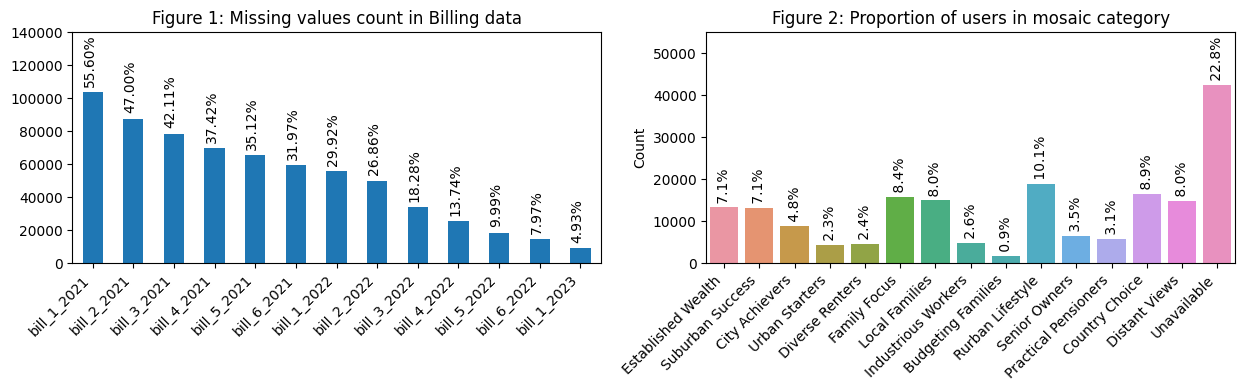

In [395]:
# temp = raw_d.copy()

# def classify_mosaic(x):
#     x['mosaicCat'] = x['mosaicType'][0]
#     return x
    
# temp['mosaicCat'] = 'Unknown'
# temp['mosaicType'] = temp['mosaicType'].fillna('Unknown')
# temp = temp.apply(classify_mosaic, axis=1)


# temp= temp.sort_values(by='mosaicCat').replace({"mosaicCat": {"A": "Established Wealth",
# "B": "Suburban Success",
# "C": "City Achievers",
# "D": "Urban Starters",
# "E": "Diverse Renters",
# "F": "Family Focus",
# "G": "Local Families",
# "H": "Industrious Workers",
# "I": "Budgeting Families",
# "J": "Rurban Lifestyle",
# "K": "Senior Owners",
# "L": "Practical Pensioners",
# "M": "Country Choice",
# "N": "Distant Views",
# "U": "Unavailable"}})


fig, axes = plt.subplots( nrows=1, ncols=2, figsize=(15,3));

x, hue, data, title = 'mosaicCat', 'EV', temp, 'Figure 2: Proportion of users in mosaic category'

ax = sns.countplot(x=x, data=data, ax=axes[1])
ax.set(ylabel='Count', title=title, xlabel='')
ax.set_xticklabels(ax.get_xticklabels() ,rotation=45, ha='right')
ax.set_ylim(0,55000)
for c in ax.containers:
    labels = [f' {h/data[hue].count()*100:0.1f}%' if (h := v.get_height()) > 0 else '' for v in c]
    ax.bar_label(c, labels=labels, label_type='edge', rotation=90)


billing_months = ['bill_1_2021', 'bill_2_2021',
       'bill_3_2021', 'bill_4_2021', 'bill_5_2021', 'bill_6_2021',
       'bill_1_2022', 'bill_2_2022', 'bill_3_2022', 'bill_4_2022',
       'bill_5_2022', 'bill_6_2022', 'bill_1_2023']

temp1 = raw_d[billing_months]

missing_values = temp1.isin([0]).sum()
ax1 = missing_values.plot(kind='bar', ax=axes[0], title="Figure 1: Missing values count in Billing data")
ax1.set_ylim(0, 140000)
for container in ax1.containers:
    ax1.set_xticklabels(ax1.get_xticklabels() ,rotation=45, ha='right')

for p in ax1.patches:
    b = p.get_bbox()
    val = "{:.2f}%".format((b.y1 + b.y0)*100/len(raw_d))        
    ax1.annotate(val, (((b.x0 + b.x1 - 0.5)/2), b.y1+5000 ), rotation=90)
    
plt.show()
    

In all of the dataset, a variety of Mosai factors have varying percentages of users as members (Fig-2) . In terms of user population, factors like Established Wealth, Suburban Success, Family Focus, Local Families, Rurban Lifestyle, Country Choice, and Distant Views account for 7% to 10%. Conversely, less than 4% of users fall into categories such as City Achievers, Urban Starters, Industrious Workers, Budgeting Families, Senior Owner, and Practical Pensioners. It is important to highlight that a sizeable percentage of the dataset, roughly 22%, lacks information on the Mosai factor.
<br/>
<br/>




A study of the gender distribution(Fig-4) in the dataset shows that 53% of the participants are classified as Mr. In the Mr group, non-EV users make up 52% of the population, while EV users make up only 0.9% of the total. Ms, Mrs., and Miss, on the other hand, make up 42% of the dataset as a whole. Only 0.4% of people in this category are EV users, leaving the majority of people to be non-EV users. These results provide insight into the distribution of EV users by gender, showing that the Mr group has a higher percentage of non-EV users and that the Ms, Mrs, and Miss categories have a considerably smaller percentage of EV users.

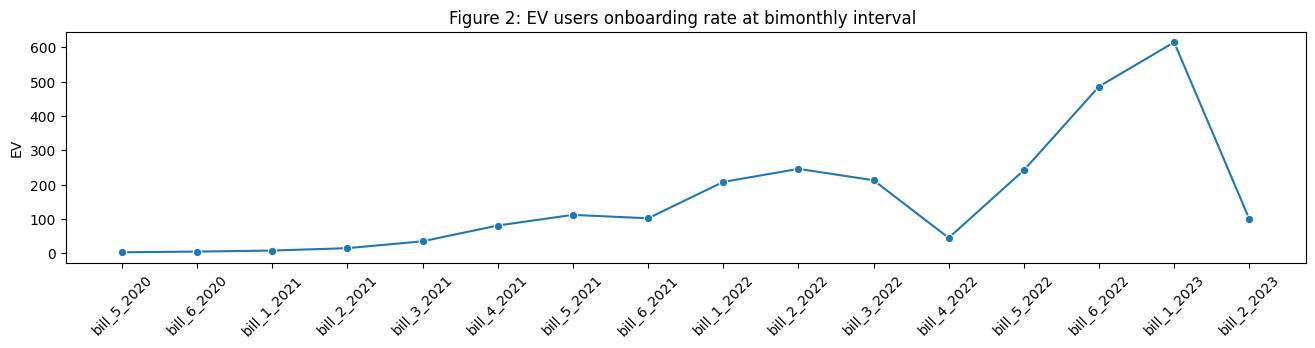

In [623]:
# ContractStartDateEV

# temp = raw_d.copy()

# temp.ContractStartDateEV.unique()

# temp2 = temp[~temp.isna()['ContractStartDateEV']]

# temp2['evYear'] = pd.DatetimeIndex(temp2['ContractStartDateEV']).year
# temp2['evMonth'] = pd.DatetimeIndex(temp2['ContractStartDateEV']).month


# temp3 = temp2.groupby(['evYear', 'evMonth'])['EV'].count().reset_index()


# # temp3['month_year'] = temp3['evMonth'].astype(str) + "_" + temp3['evYear'].astype(str)

# def makeBiMontlyData(x):
#     if((x['evMonth'] % 2) == 0):
#         x['bill_month'] =  '_'.join(['bill', str(int(x['evMonth'] / 2)), str(x['evYear'])])
#     else:
#         x['bill_month'] =  '_'.join(['bill', str(int((x['evMonth'] + 1) / 2)), str(x['evYear'])])
#     return x

# temp3['bill_month'] = 0
# temp3 = temp3.apply(makeBiMontlyData,axis=1)

# temp4 = temp3.groupby(['bill_month', 'evYear'])['EV'].sum().reset_index()

# temp4 = temp4.sort_values(by=['evYear'])


# fig, axes = plt.subplots( nrows=1, ncols=1, figsize=(15,3));
plt.figure(figsize=(16,3))
ax = sns.lineplot(data=temp4, x="bill_month", y="EV", marker='o') #, ax=axes[0]);
ax.tick_params(axis='x', labelrotation = 45)
ax.set_xlabel('');
ax.set_title('Figure 2: EV users onboarding rate at bimonthly interval ');


billing_months = ['bill_1_2021', 'bill_2_2021',
       'bill_3_2021', 'bill_4_2021', 'bill_5_2021', 'bill_6_2021',
       'bill_1_2022', 'bill_2_2022', 'bill_3_2022', 'bill_4_2022',
       'bill_5_2022', 'bill_6_2022', 'bill_1_2023']

temp1 = raw_d[billing_months]

# missing_values = temp1.isin([0]).sum()
# ax1 = missing_values.plot(kind='bar', ax=axes[1], title="Figure 1: Missing values count in Billing data")
# ax1.set_ylim(0, 140000)
# for container in ax1.containers:
#     ax1.set_xticklabels(ax1.get_xticklabels() ,rotation=45, ha='right')

# for p in ax1.patches:
#     b = p.get_bbox()
#     val = "{:.2f}%".format((b.y1 + b.y0)*100/len(raw_d))        
#     ax1.annotate(val, (((b.x0 + b.x1 - 0.5)/2), b.y1+5000 ), rotation=90)


The distribution of users among various categories is shown by the study of the Signed up group component(Fig-5). 16.9% of users fall into the PCW category, with 0.2% of them being EV users and 16.7% of them being non-EV users. 21.3% of users fall into the Telesales group, with 21% of them being EV users. 14.9% of users are in the Web category, of which 14.5% are non-EV users and 0.4% are EV users. A minimum of 0.1% of users are solely EV users, with field sales and OBS being the other 23.6% of users. The remaining 29.4% of customers fall into the "Others" category, with 0.3% of them being designated as EV users. These results demonstrate the distribution of EV and non-EV users across various signed up


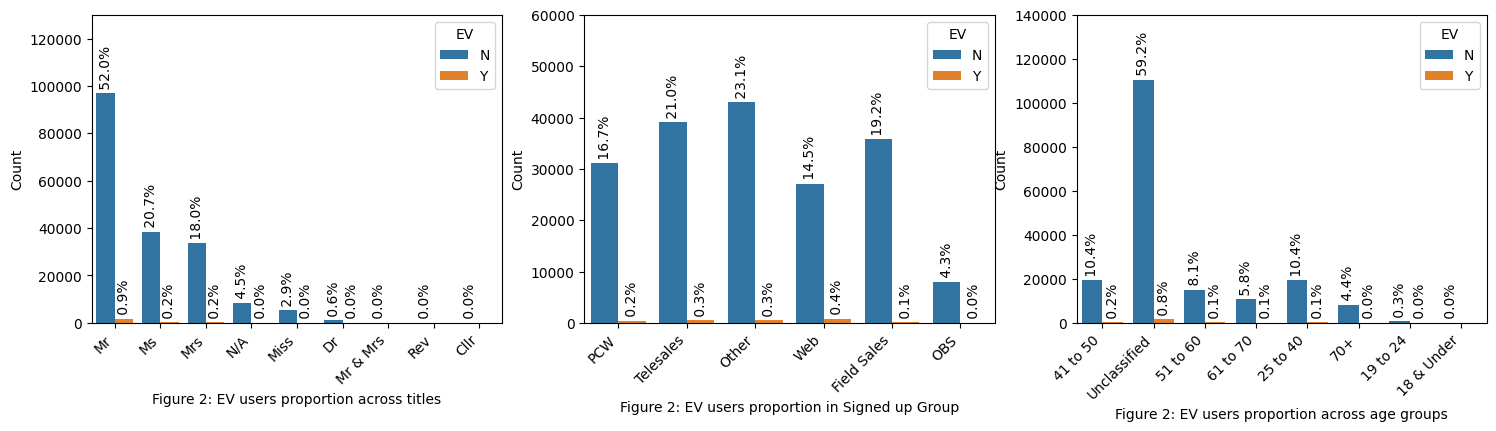

In [627]:
def getCountGraph(x, hue, data, axes, title ):
    ax = sns.countplot(x=x, hue=hue, data=data, ax=axes)
    ax.set(ylabel='Count', xlabel=title)
    ax.set_xticklabels(ax.get_xticklabels() ,rotation=45, ha='right')

    for c in ax.containers:
        labels = [f' {h/data[hue].count()*100:0.1f}%' if (h := v.get_height()) > 0 else '' for v in c]
        ax.bar_label(c, labels=labels, label_type='edge', rotation=90)

temp = raw_d.copy()

temp = temp.replace({'title': {' ':'N/A'}})

fig, axes = plt.subplots( nrows=1, ncols=3, figsize=(18,4));

getCountGraph('title', 'EV', temp, axes[0], 'Figure 2: EV users proportion across titles')
axes[0].set_ylim(0,130000)
getCountGraph('signedUpGroup', 'EV', temp, axes[1], 'Figure 2: EV users proportion in Signed up Group')
axes[1].set_ylim(0,60000)
getCountGraph('agedBand', 'EV', temp, axes[2], 'Figure 2: EV users proportion across age groups')
axes[2].set_ylim(0,140000)

plt.show()



A study of user distribution by age groupings(Fig-6) reveals some intriguing trends. Notably, no users under the age of 24 were discovered. However, 10.5% of the population is between the ages of 25 and 40, with 10.4% of that group using electric vehicles and 0.1% of the population being solely EV users. When it came to customers who were between the ages of 41 and 50, 10.6% of them were found, and only 0.2% of them were EV users. A significant 60% of users were found to be between the ages of 51 and 60, and 0.8% of these users were solely electric vehicle (EV) users. Only 0.1% of the 5.14% of customers who were 60 and older were EV users. It is remarkable that a sizable 60% of users belonged to an unspecified age bracket, and that only 0.8% of this group were found to be EV users. These results demonstrate the diverse percentages of EV users across various age groups, highlighting possible chances for targeted advertising and outreach initiatives.


## <a id='4_3' href="#4_3">Measure of Association:</a>



In [625]:
from scipy.stats import chi2_contingency

temp = raw_d.copy()

def performAssociationCheck(cat2, temp ):
    contingency_table = pd.crosstab(temp['EV'], temp[cat2])
    _, p_value, _, _ = chi2_contingency(contingency_table)
    arr = [cat2, 'There is no association between {} and {} variables'.format(cat2, 'EV'), str(p_value), 'Significant' if(p_value < 0.05) else 'Not Significant']
#     print(arr)
    return arr

rows = []
for row in ['agedBand', 'signedUpGroup', 'title','mosaicType']:
    rows.append(performAssociationCheck(row, temp))

null_hyp = []
    
v = pd.DataFrame(rows, columns=['Variable', 'Null Hypothesis', 'p-value', 'Significance']).style.set_caption('Table 1.1 Testing Significance between variables using Chi Square test.').set_table_styles(styles).hide(axis="index")

v

Variable,Null Hypothesis,p-value,Significance
agedBand,There is no association between agedBand and EV variables,3.13213811595283e-09,Significant
signedUpGroup,There is no association between signedUpGroup and EV variables,1.415185184357035e-149,Significant
title,There is no association between title and EV variables,9.310374982118508e-62,Significant
mosaicType,There is no association between mosaicType and EV variables,1.324534407799008e-66,Significant


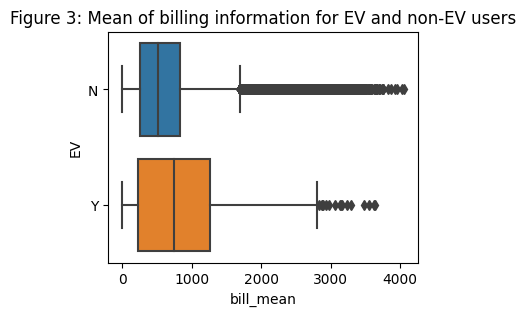

In [630]:

temp['bill_mean'] = temp[billing_months].mean(axis=1)

plt.figure(figsize=(4,3))
ax=sns.boxplot(data=temp, x="bill_mean", y='EV');
ax.set_title('Figure 3: Mean of billing information for EV and non-EV users');


## <a id='4_4' href="#4_4">Data Wrangling:</a>



The Graph below shows  If reading for a billing cycle is missed, the reading will be included in the next billing cycle. So average reading value is applied for previous and current month. Only one intermittent zero value is filled this way Consecutive zero values are ignored.

In [312]:
def average_missing_months(x):
    for index, month in enumerate(billing_months[:-1]):
        next_month = billing_months[index+1]
        if x[month] == 0:
            if(x[next_month] != 0):
                x[month] = x[next_month] / 2
                x[next_month] = x[next_month] / 2
            else:
                break
    return x

temp2 = raw_d.copy()
missing_months_handled = temp2.apply(average_missing_months, axis=1)

temp3 = missing_months_handled[billing_months]

missing_values2 = temp3.isin([0]).sum()


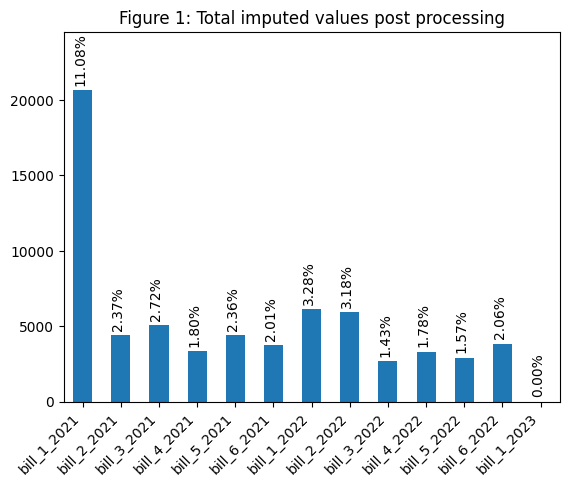

In [619]:
pre_missing_vals = raw_d.copy()

pre_missing_vals = pre_missing_vals[billing_months]

pre_missing_vals = pre_missing_vals.isin([0]).sum()

total_imputed_vals = pre_missing_vals - missing_values2

ax2 = total_imputed_vals.plot(kind='bar', title="Figure 1: Total imputed values post processing")
ax2.set_ylim(0, 24500)
for container in ax2.containers:
    ax2.set_xticklabels(ax2.get_xticklabels() ,rotation=45, ha='right')
    
for p in ax2.patches:
    b = p.get_bbox()
    val = "{:.2f}%".format((b.y1 + b.y0)*100/len(raw_d))        
    ax2.annotate(val, (((b.x0 + b.x1 - 0.5)/2), b.y1+500 ), rotation=90)
    
    



## <a id='method' href="#method">Methodology:</a>

## <a href="#comparison" id="comparison">6. Comparison of Modal performance</a><br/>


In [616]:
# Data Preprocessing

def classify_mosaic(x):
    x['mosaicType'] = x['mosaicType'][0]
    return x
    
    
# implement the average imputation on single missing data
def average_missing_months(x):
    for index, month in enumerate(billing_months[:-1]):
        next_month = billing_months[index+1]
        if x[month] == 0:
            if(x[next_month] != 0):
                x[month] = x[next_month] / 2
                x[next_month] = x[next_month] / 2
            else:
                break
    return x

# # take a copy of raw data
LR_data = raw_d.copy()

LR_data = LR_data.drop(columns=['accountID','StartDate','ContractStartDateEV','contractStartDate','contractEndDate','saStatus'])

LR_data = LR_data.apply(average_missing_months, axis=1)

LR_data['mosaicType'] = LR_data['mosaicType'].fillna('Unknown')
LR_data = LR_data.apply(classify_mosaic, axis=1)


le = LabelEncoder()
 
# keeping nan values in title, agedband as they have relatively less effect on EV classification
LR_data['title'] = le.fit_transform(LR_data['title'])
LR_data['mosaicType'] = le.fit_transform(LR_data['mosaicType'])
LR_data['agedBand'] = le.fit_transform(LR_data['agedBand'])
LR_data['signedUpGroup'] = le.fit_transform(LR_data['signedUpGroup'])

# manually assigning numeric values to EV related categories
rename_props = { 'EV': {'N': 0, 'Y': 1},
                  'EV_New_or_Old': {'Non-EV Customers': 0, 'Switched to EV': 1, 'New EV Customer': 1}} 

LR_data = LR_data.replace(rename_props)



array([14,  5,  6, 10, 12, 13, 11,  1,  2,  4,  0,  9,  7,  3,  8])

In [ ]:
LR_df = LR_data.copy()

from imblearn.over_sampling import SMOTE 
sampler = SMOTE(random_state=42)

x = LR_df.drop('EV', axis=1)  
y = LR_df['EV']

X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.20, stratify=y, random_state=42)
X_train, y_train = sampler.fit_resample(X_train, y_train)

LR = LogisticRegression(C=0.00005, random_state=0, solver='lbfgs')

LR.fit(X_train, y_train)
y_pred = LR.predict(X_test)
metrics = get_metrics(y_pred, X_test, y_test, LR, x, y, sampling, modal_name='Linear Regression')


## <a id='references' href="#references">References:</a>

- Shane Prendergast, Direction of Travel - the growing EV markets in Ireland (26 April 2023) https://www.seai.ie/blog/ev-direction-of-travel/ [accessed 26 May 2023].




In [496]:

from IPython.display import HTML

HTML('''<script>
show=true; 
$('a').css({"text-decoration": "none"})


function code_toggle() {
 if (show){
 $('div.input').hide();
  $('.output_stderr').hide();
  $('bdi').hide();
  $('.rendered_html p').css({
    "text-align": "justify"   
});
  
 } else {
 $('div.input').show();
 $('.output_stderr').show();
 $('bdi').show();

 }
 show = !show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Toggle code blocks."></form>''')